_______________________
<font size=8 color=maroon> WEEK 24 : GRADED MINI PROJECT

_________________

<font size=6 color=chocolate>Bank Customer Churn Analysis

In today’s competitive financial landscape, customer retention is a key driver of profitability. A leading international bank is experiencing a surge in customer churn—clients are closing accounts despite a wide array of financial products. This trend threatens long-term growth and brand loyalty.

<font size=5 color=olive> Objective
As a data analyst, your mission is to:
- Analyze customer data to uncover churn-driving factors.
- Build a predictive model to classify customers as likely to stay or exit.
- Enable targeted retention strategies for at-risk customers.

<font size=5 color=olive>Problem Statement
> “Which customers are at risk of leaving the bank?”

Answering this question empowers the bank’s marketing and customer success teams to proactively engage vulnerable customers and reduce churn.

<font size=5 color=olive>Introduction

This notebook addresses the project objectives: cleaning and preprocessing the dataset, performing EDA to uncover churn patterns, building predictive models for churn, and deriving insights. The dataset contains customer data with the target variable Exited (1 = churned, 0 = stayed).

<font size=5 color=olive>Libraries used:

- pandas for data manipulation
- numpy for numerical operations
- matplotlib and seaborn for visualization
- scikit-learn for preprocessing, modeling, and evaluation
- scipy for hierarchical clustering (explored in EDA for unsupervised insights)


-------------
<font size=6 color=seagreen > Tasks To Do

--------------


<font size=4 color=cyan>1. Data Cleaning & Preprocessing

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Dataset
df = pd.read_csv('/content/Data.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15708791.0,Abazu,584,Spain,Male,32.0,9,85534.83,1,0.0,0.0,169137.24,0
1,15576156.0,Abazu,710,Spain,Female,28.0,6,0.00,1,1.0,0.0,48426.98,0
2,15737792.0,Abbie,818,France,Female,31.0,1,186796.37,1,0.0,0.0,178252.63,0
3,15680804.0,Abbott,850,France,Male,29.0,6,0.00,2,1.0,1.0,10672.54,0
4,15723706.0,Abbott,573,France,Female,33.0,0,90124.64,1,1.0,0.0,137476.71,0


In [3]:
print(f'Shape of the dataset\t: {df.shape}')
print(f'Row Labels\t\t:  {df.index}')
print(f'\nColumns:\n {df.columns}')
print(f'\nData types: \n{df.dtypes}')

Shape of the dataset	: (10502, 13)
Row Labels		:  RangeIndex(start=0, stop=10502, step=1)

Columns:
 Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Data types: 
CustomerId         float64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


In [4]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10502 entries, 0 to 10501
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9571 non-null   float64
 1   Surname          10502 non-null  object 
 2   CreditScore      10502 non-null  int64  
 3   Geography        10490 non-null  object 
 4   Gender           9560 non-null   object 
 5   Age              9516 non-null   float64
 6   Tenure           10502 non-null  int64  
 7   Balance          10502 non-null  float64
 8   NumOfProducts    10502 non-null  int64  
 9   HasCrCard        10501 non-null  float64
 10  IsActiveMember   10501 non-null  float64
 11  EstimatedSalary  10502 non-null  float64
 12  Exited           10502 non-null  int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 1.0+ MB
None


In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.571000e+03,10502.000000,9516.000000,10502.000000,10502.000000,10502.000000,10501.000000,10501.000000,10502.000000,10502.000000
mean,1.569088e+07,650.773948,38.899015,5.015045,76426.091730,1.530375,0.704980,0.514713,100401.133536,0.204247
std,7.197178e+04,96.725437,10.523426,2.895205,62423.431813,0.581580,0.456073,0.499807,57536.903200,0.403169
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1.562831e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000,51431.732500,0.000000
50%,1.569059e+07,652.000000,37.000000,5.000000,97029.715000,1.000000,1.000000,1.000000,100600.355000,0.000000
75%,1.575311e+07,718.000000,44.000000,8.000000,127647.840000,2.000000,1.000000,1.000000,149643.620000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


><font color=goldenrod>Detecting Missing Values

In [6]:
# Returns True/False Values for each Columns
df.isnull()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10497,False,False,False,False,False,False,False,False,False,False,False,False,False
10498,False,False,False,False,False,False,False,False,False,False,False,False,False
10499,True,False,False,False,True,True,False,False,False,False,False,False,False
10500,True,False,False,False,True,True,False,False,False,False,False,False,False


In [7]:
# Column-wise sum
df.isna().sum(axis=0)

,0
CustomerId,931
Surname,0
CreditScore,0
Geography,12
Gender,942
Age,986
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,1


In [8]:
# Calculating the percentage of missing values
(df.isna().sum() / df.shape[0] *100).round

<bound method Series.round of CustomerId         8.864978
Surname            0.000000
CreditScore        0.000000
Geography          0.114264
Gender             8.969720
Age                9.388688
Tenure             0.000000
Balance            0.000000
NumOfProducts      0.000000
HasCrCard          0.009522
IsActiveMember     0.009522
EstimatedSalary    0.000000
Exited             0.000000
dtype: float64>

><font color=goldenrod>Handling Missing Values

<font size=3 color=yellowgreen>Drop '***CustomerId***' (high missing: 931; ID only, potential duplicates) and 'Surname' (categorical, not useful for prediction).

In [9]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
print("Shape after dropping IDs:", df.shape)
print("Missing values after drop:\n", df.isnull().sum())

Shape after dropping IDs: (10502, 11)
Missing values after drop:
 CreditScore          0
Geography           12
Gender             942
Age                986
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
dtype: int64


<font size=3 color=yellowgreen>Imputation with rest of the missing values in the data

In [10]:
print(f'Missing values before imputation:\n{df.isna().sum()}')

#Geography
df['Geography'].fillna(df['Geography'].mode()[0], inplace=True)
#Gender
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
#Age
df['Age'].fillna(df['Age'].median(), inplace=True)

#HasCrCard and IsActiveMember
df['HasCrCard'].fillna(df['HasCrCard'].mode()[0], inplace=True)
df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0], inplace=True)
df['HasCrCard'] = df['HasCrCard'].astype(int)
df['IsActiveMember'] = df['IsActiveMember'].astype(int)

print(f'\nMissing values after imputation:\n{df.isna().sum()}')
print(f'\nData types after: \n{df.dtypes}')

Missing values before imputation:
CreditScore          0
Geography           12
Gender             942
Age                986
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            1
IsActiveMember       1
EstimatedSalary      0
Exited               0
dtype: int64

Missing values after imputation:
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data types after: 
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


><font color=goldenrod>Detect and Remove Duplicate Records

In [11]:
# Check Duplicates
print(f'Number of duplicate records: {df.duplicated().sum()}')

Number of duplicate records: 502


In [12]:
# Remove duplicates (based on all columns except target for fairness)
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())
print("Shape after duplicate removal:", df.shape)

Duplicates after: 0
Shape after duplicate removal: (10000, 11)


><font color=goldenrod>Convert Categorical Variables to Numerical

- <font color=yellowgreen> One-hot encode 'Geography' (France/Spain/Germany) and 'Gender' (Male/Female).
- <font color=yellowgreen> Binary vars (HasCrCard, etc.) already numerical.


In [13]:
# one-hot encode
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
print("\nShape after encoding :", df_encoded.shape)
print("\nNew Columns: ", [col for col in df_encoded.columns if 'Geography_' in col or 'Gender_' in col])
print(f'\nEncoded data type:\n{df_encoded.dtypes}')
print(f'\nDataset:\n')
df_encoded.head()


Shape after encoding : (10000, 12)

New Columns:  ['Geography_Germany', 'Geography_Spain', 'Gender_Male']

Encoded data type:
CreditScore            int64
Age                  float64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

Dataset:



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,584,32.0,9,85534.83,1,0,0,169137.24,0,False,True,True
1,710,28.0,6,0.00,1,1,0,48426.98,0,False,True,False
2,818,31.0,1,186796.37,1,0,0,178252.63,0,False,False,False
3,850,29.0,6,0.00,2,1,1,10672.54,0,False,False,True
4,573,33.0,0,90124.64,1,1,0,137476.71,0,False,False,False


><font color=goldenrod> Scale Numerical Features (Only)
- <font color=yellowgreen>Numerical: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary.
- Use StandardScaler (mean=0, std=1) for modeling/clustering.


In [17]:
# Numerical Columns
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(f'\nScaled data type:\n{df_encoded.dtypes}')
print(f'\nScaled Sample: \n')
df_encoded.head()


Scaled data type:
CreditScore          float64
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany       bool
Geography_Spain         bool
Gender_Male             bool
dtype: object

Scaled Sample: 



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.688359,-0.669303,1.378686,0.145028,-0.911583,0,0,1.200658,0,False,True,True
1,0.615335,-1.068238,0.341352,-1.225848,-0.911583,1,0,-0.898372,0,False,True,False
2,1.732787,-0.769037,-1.387538,1.767958,-0.911583,0,0,1.359166,0,False,False,False
3,2.063884,-0.968504,0.341352,-1.225848,0.807737,1,1,-1.554884,0,False,False,True
4,-0.802173,-0.569569,-1.733315,0.218590,-0.911583,1,0,0.650113,0,False,False,False


In [18]:
print(f'\nScaled Mean (should be ~0):\n')
df_encoded[num_cols].mean()


Scaled Mean (should be ~0):



,0
CreditScore,-1.350031e-17
Age,4.263256e-18
Tenure,-2.344791e-17
Balance,1.136868e-17
NumOfProducts,7.105427e-18
EstimatedSalary,-1.563194e-17


In [19]:
print(f'\nScaled Std (should be ~1):\n')
df_encoded[num_cols].std()


Scaled Std (should be ~1):



,0
CreditScore,1.00005
Age,1.00005
Tenure,1.00005
Balance,1.00005
NumOfProducts,1.00005
EstimatedSalary,1.00005


<font size=4 color=cyan>2. Exploratory Data Analysis (EDA)



><font color=goldenrod> Explore the distribution of Exited (churn vs non-churn)

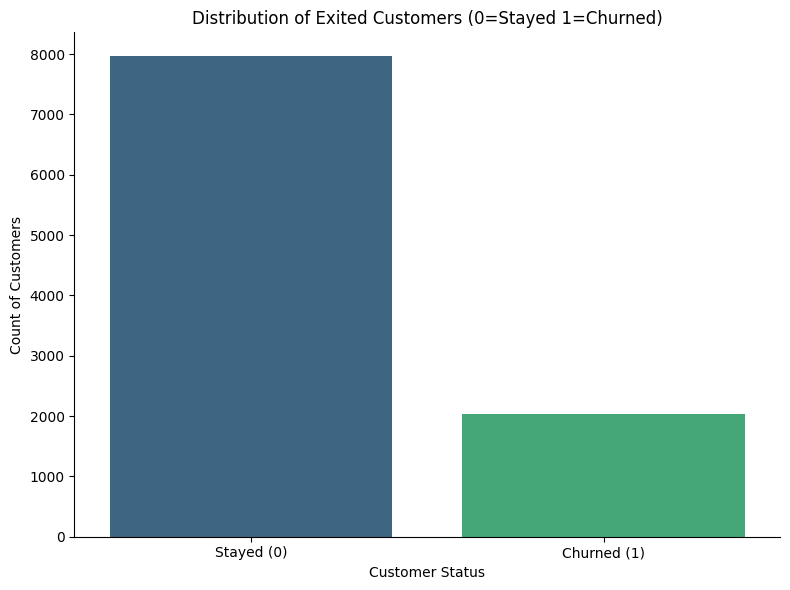

In [48]:
# Use original df for vizualization (pre-scaling/Encoding)
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Exited',palette='viridis')
plt.title('Distribution of Exited Customers (0=Stayed 1=Churned)')
plt.xlabel('Customer Status')
plt.ylabel('Count of Customers')
ax.set_xticklabels(['Stayed (0)', 'Churned (1)'])
sns.despine()
plt.tight_layout()
plt.show()

In [28]:
churn_rate = df['Exited'].value_counts(normalize=True)* 100
print('Churn Rate:\n Stayed: {:.1f}%,\n Churned: {:.1f}%'.format(churn_rate[0],churn_rate[1]))

Churn Rate:
 Stayed: 79.6%,
 Churned: 20.4%


><font color=goldenrod> Find key patterns:
- <font color=yellowgreen> Does age affect churn?
- Are certain geographies more likely to churn?
- Does credit score or balance play a role?

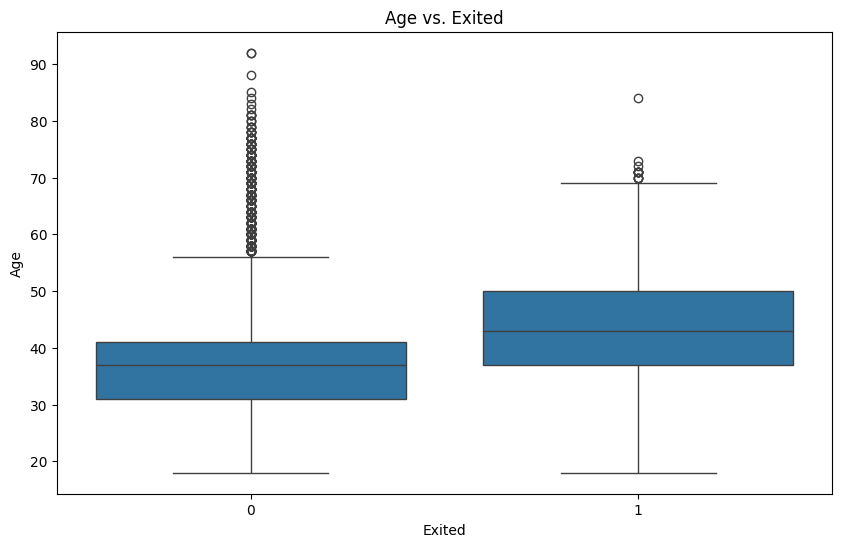

In [29]:
# Does age affect churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Age vs. Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

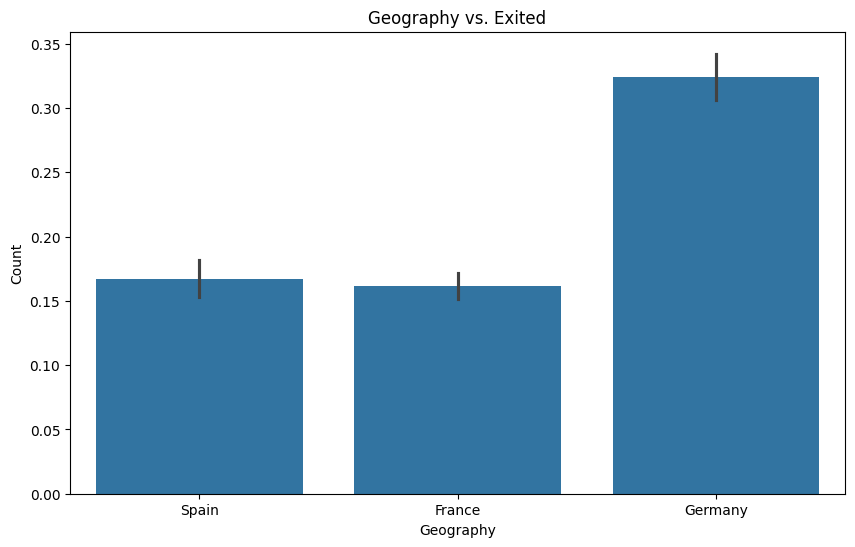

In [35]:
# Are certain geographies more likely to churn
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Geography', y='Exited')
plt.title('Geography vs. Exited')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

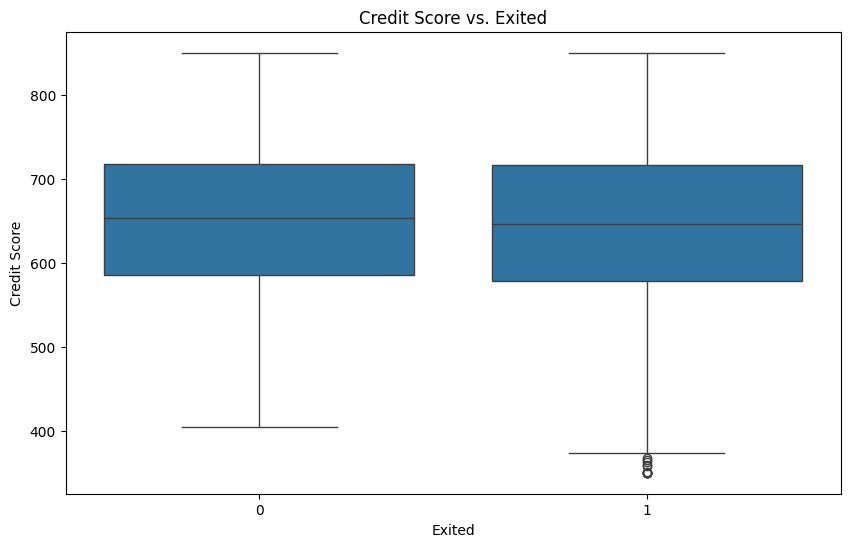

In [38]:
#Does credit score play a role
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exited', y='CreditScore')
plt.title('Credit Score vs. Exited')
plt.xlabel('Exited')
plt.ylabel('Credit Score')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

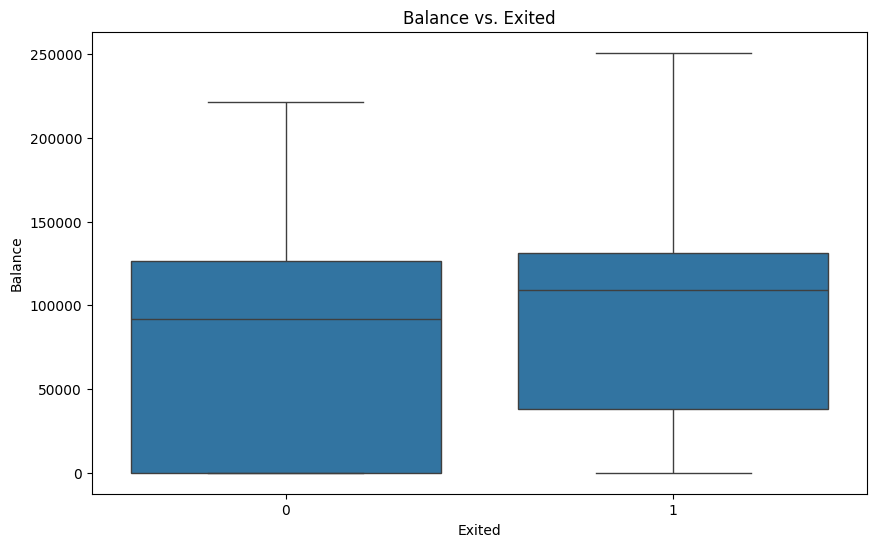

In [39]:
#Does balance play a role
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Exited', y='Balance')
plt.title('Balance vs. Exited')
plt.xlabel('Exited')
plt.ylabel('Balance')
plt.show

><font color=goldenrod>Visualize churn rates across different customer groups

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

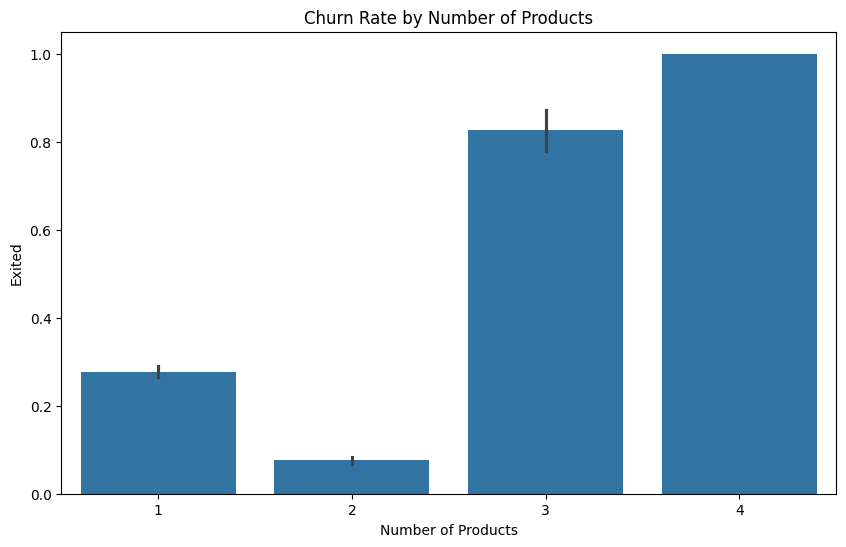

In [40]:
# Churn rates by groups (e.g., NumOfProducts)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='NumOfProducts', y='Exited')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt

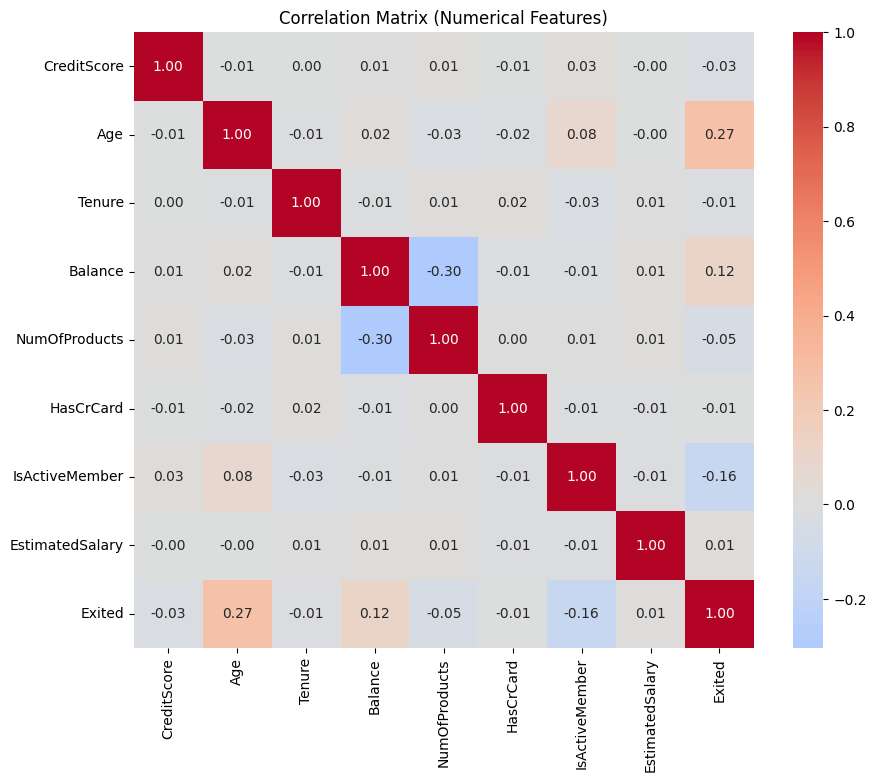

In [41]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm',center=0, fmt=".2f")
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

<font size=4 color=cyan>2. Exploratory Data Analysis (EDA)


><font color=goldenrod>Split the dataset into training and test sets.